# Cumulative Statistical Practical Application

## Problem 1 ()

Raymond Computer Inc., a manufacturer of computers, buys microchips (or chips) from Hall Electronics, Deltronics and Alpha. Raymond buys 30 percent of microchips from Hall Electronics, 20 percent from Deltronics and 50 percent from Alpha.  Raymond has extensive histories of the three suppliers and knows that 3 percent of the chips purchased from Hall Electronics are defective, 5 percent of chips from Deltronics are defective and 4 percent of chips from Alpha are defective. When the chips arrive at the Raymond, they are placed directly in a bin and not inspected or otherwise identified by a supplier. A worker selects a chip for installation in the computer and finds it defective. What is the probability (using Bayes’ Theorem) that it was manufactured by Deltronics?  

In [4]:
# Define the probabilities
P_H <- 0.30 # probability chip is from Hall Electronics
P_DEL <- 0.20 # probability chip is from Deltronics
P_A <- 0.50 # probability chip is from Alpha

# Percent of defective chips
P_D_given_H <- 0.03
P_D_given_DEL <- 0.05
P_D_given_A <- 0.04

# Calculate the total probability of a defective chip
P_D <- P_D_given_H * P_H + P_D_given_DEL * P_DEL + P_D_given_A * P_A

# Calculate the probability that a defective chip is from Deltronics
# Bayes Theorem
P_DEL_given_D <- (P_D_given_DEL * P_DEL) / P_D
P_DEL_given_D
cat(100*P_DEL_given_D, "%\n")

[1] 0.2564103

25.64103 %


## Problem 2 ()

A sample of executives were surveyed about the loyalty to their company. One of question was “If you were given an offer by another company equal to or slightly better than your position, would you remain with the company or take the position” The responses of 200 executives in the survey were cross-classified with their length of service with the company in the table below: 
 
Length of Service (table below in csv format)

>Loyalty, Less than 1 year (B1), 1-5  Years (B2),  6-10 Years (B3), More than 10 Years (B4), Total
>
>Would Remain A1, 10, 30, 5, 75, 120
>
>Would not remain A2, 25, 15, 10, 30, 80


Answer the following questions: 

(a) What is the probability of selecting an executive with more than 10 years of service? 

(b) What is the probability of selecting an executive who would not remain with the company given that he or she has more than 10 years of service? 

(c) What is the probability of selecting an executive with more than 10 years of service or one who would not remain with the company? 


In [8]:
# Define the data
data <- matrix(c(
  10, 30, 5, 75, 120,  # Would Remain A1
  25, 15, 10, 30, 80   # Would not remain A2
), nrow = 2, byrow = TRUE)

# Set row and column names
rownames(data) <- c("Would Remain", "Would not remain")
colnames(data) <- c("Less than 1 year", "1-5 Years", "6-10 Years", "More than 10 Years", "Total")

# Print the matrix
print(data)

                 Less than 1 year 1-5 Years 6-10 Years More than 10 Years Total
Would Remain                   10        30          5                 75   120
Would not remain               25        15         10                 30    80


In [9]:
# (a)

ten_yos <- 105 # Number of executives more than 10 years of service
total_exec <- 200 # Total number of executives

# P(B4) = 
probability <- ten_yos / total_exec
probability
cat(100*probability, "%\n")

[1] 0.525

52.5 %


In [10]:
# (b)
ten_yos_no_return <- 30 # executives more than 10 years of service that will not remain
total_exec_10_years <- 105 # Total number of executives with more than 10 years

# P(A2 | B4) = 
probability <- ten_yos_no_return / total_exec_10_years
probability
cat(100*probability, "%\n")

[1] 0.2857143

28.57143 %


In [20]:
# (c)

# Set row and column names
rownames(data) <- c("Would Remain", "Would not remain")
colnames(data) <- c("Less than 1 year", "1-5 Years", "6-10 Years", "More than 10 Years", "Total")

# Total number of executives
total_executives <- sum(data[, "Total"])

# Number of executives with more than 10 years of service
more_than_10_years <- sum(data[, "More than 10 Years"])

# Number of executives who would not remain
not_remain <- data["Would not remain", "Total"]

# Number of executives with more than 10 years of service and not remaining
intersection <- data["Would not remain", "More than 10 Years"]

# Probability calculation, P(A union B)= P(A) + P(B) − P(A intersect B)
probability <- (more_than_10_years + not_remain - intersection) / total_executives
cat("(",more_than_10_years,"+",not_remain,"-",intersection,") /",total_executives)

probability
cat(100*probability, "%\n")

( 105 + 80 - 30 ) / 200

[1] 0.775

77.5 %


## Problem 3 (Conditional Probability in Words)

If R is the event that a convict committed armed robbery and D is the event that the convict pushed dope, state in words what probabilities are expressed by 

(a) P (R | D): The probability that a convict committed armed robbery given that the convict pushed dope. In other words, it's the likelihood that a convict is an armed robber if they are known to have pushed dope.

(b) P (D’ | R): The probability that a convict did not push dope given that the convict committed armed robbery. It represents the likelihood that a convict is not a dope pusher if they are known to have committed armed robbery.

(c) P (R’ | D’): The probability that a convict did not commit armed robbery given that the convict did not push dope. It represents the likelihood that a convict is not an armed robber if they are known not to have pushed dope.


## Problem 4 (Probability of Joint Density Function)

A candy company distributes boxes of chocolates with a mixture of creams, toffees, and cordials. Suppose that the weight of each box is 1 kilogram, but the individual weights of the creams, toffees, and cordials vary from box to box. For a randomly selected box, let X and Y represent the weights of the creams and the toffees, respectively, and suppose that the joint density function of these variables is 

f(x, y) = 24xy, 0 ≤ x ≤ 1, 0 ≤ y ≤1, x+y ≤ 1

f(x, y) = 0 elsewhere 

(a) Find the probability that in a given box the cordials account for more than 1/2 of the weight. 

(b) Find the marginal density for the weight of the creams. 

(c) Find the probability that the weight of the toffees in a box is less than 1/8 of a kilogram if it is known that creams constitute 3/4 of the weight. 

In [27]:
# Weight of Cordials, denoted as Z
# Z = 1 - X - Y
# if Z > 1/2, then 1 - X - Y > 1/2
# So, X + Y < 1/2

# Define the joint density function
f <- function(x, y) {
  24 * x * y
}

# Define the limits of integration
lower_x <- 0
upper_x <- 1/2

# P(X + Y < 1/2) = integral(0 -> 1/2) * integral(0 -> 1/2-x)*24xy*dy*dx
prob_cordials_more_than_half <- integrate(
  function(x) sapply(x, function(x) integrate(f, lower = 0, upper = 1/2 - x, x = x)$value),
  lower = lower_x,
  upper = upper_x
)$value

prob_cordials_more_than_half
cat(100*prob_cordials_more_than_half, "%\n")

[1] 0.0625

6.25 %


In [30]:
# Marginal density function for creams
# fsubX(x) = integral(0 -> 1-x)*24xy*dy
f_x <- function(x) {
  integrate(function(y) f(x, y), lower = 0, upper = 1 - x)$value
}

# Test for a specific x value, x = 0.25
marginal_density_cream <- f_x(0.25)

marginal_density_cream

[1] 1.6875

In [29]:
# Conditional probability for toffees
# P(Y <1/8 | X = 3/4) = (integrate(0 -> 1/8)*f(3/4,y)*dy) / (fsubX(3/4))
numerator <- integrate(function(y) f(3/4, y), lower = 0, upper = 1/8)$value
denominator <- f_x(3/4)
prob_toffees_less_than_1_8 <- numerator / denominator

prob_toffees_less_than_1_8
cat(100*prob_toffees_less_than_1_8, "%\n")

[1] 0.25

25 %


## Problem 5 (Expected Value & Variance)

The random variables X and Y represent the number of vehicles that arrive at two separate street corners during a certain 2-minute period in the day. The joint distribution is 

f (x, y) = (1 / 4^(x + y)) (9/16)

for x = 0, 1, 2, 3,… and y = 0, 1, 2, 3,…

(a) Give E(X), E(Y ),  Var(X ), and Var(Y ) 

(b) Consider Z= X+ Y the sum of the two, Find E(Z) and Var( Z) 


Marginal Distribution
fsubX(x) = ReimannSum(inf, y=0)* f(x,y)= ReimannSum(inf, y=0)* (1/4^(x) * (9/16) * 1/4^(y))

ReimannSum(inf, y=0) * 1/4^(y) = 1 / (1 - (1/4)) = 4/3

fsubX(x) = (1/4^(x) * (9/16) * (4/3)) = (3/16) * (1/4^(x))

fsubY(y) = (3/16) * (1/4^(y))

Both X and Y follow a geometric distribution shifted by one with parameter (p) = 1/4.

In [1]:
# Define the parameter for the geometric distribution
p <- 1 / 4

# Expected values for X and Y (E(X) and E(Y))
E_X <- (1 - p) / p
E_Y <- (1 - p) / p

# Variances for X and Y (Var(X) and Var(Y))
Var_X <- (1 - p) / (p^2)
Var_Y <- (1 - p) / (p^2)

# Expected value and variance for Z = X + Y
E_Z <- E_X + E_Y
Var_Z <- Var_X + Var_Y

# Results
cat("E(X) =", E_X, "\n")
cat("E(Y) =", E_Y, "\n")
cat("Var(X) =", Var_X, "\n")
cat("Var(Y) =", Var_Y, "\n")
cat("E(Z) =", E_Z, "\n")
cat("Var(Z) =", Var_Z, "\n")

E(X) = 3 
E(Y) = 3 
Var(X) = 12 
Var(Y) = 12 
E(Z) = 6 
Var(Z) = 24 


## Problem 6 (Creating Probability Distribution)

A random committee of size 3 is selected from 4 doctors and 2 nurses. Write a formula for the probability distribution of the random variable x representing the number of doctors on the committee.  Also, find P(2≤ x ≤ 3) 

In [2]:
# Total number of ways to choose 3 people from 6
total_ways <- choose(6, 3)

# Probability distribution
p_X_0 <- 0  # Impossible to select 0 doctors and 3 nurses
p_X_1 <- choose(4, 1) * choose(2, 2) / total_ways # Select 1 doctor and 2 nurses
p_X_2 <- choose(4, 2) * choose(2, 1) / total_ways # Select 2 doctors and 1 nurse
p_X_3 <- choose(4, 3) * choose(2, 0) / total_ways # Select 3 doctors and 0 nurses

# Probability that 2 ≤ X ≤ 3
p_2_to_3 <- p_X_2 + p_X_3

# Display the results
cat("P(X = 0) =", p_X_0, "\n")
cat("P(X = 1) =", p_X_1, "\n")
cat("P(X = 2) =", p_X_2, "\n")
cat("P(X = 3) =", p_X_3, "\n")
cat("P(2 ≤ X ≤ 3) =", p_2_to_3, "\n")


P(X = 0) = 0 
P(X = 1) = 0.2 
P(X = 2) = 0.6 
P(X = 3) = 0.2 
P(2 = X = 3) = 0.8 


## Problem 7 (Probabilities of a Normal Distribution)

Given the normally distributed variable X with mean 18 and standard deviation 2.5, find

(a) P(X < 15); 

(b) the value of kk such that P(X < k) = 0.2236; 

(c) the value of kk such that P(X > k) = 0.1814; 

(d) P(17 < x < 21)

In [17]:
# calculate a Z score using the following

# z-score function in R, use if you want to identify Z-Score versus R CDF function
z_score_function <- function(X, mu, sigma) {
  z <- (X - mu) / sigma
  return(z)
}

In [5]:
# Define variables
mu <- 18 # mean
std_dev <- 2.5 # standard deviation

In [16]:
# (a)
p_a <- pnorm(15, mu, std_dev)
cat("P(X < 15) =", p_a, "\n")

P(X < 15) = 0.1150697 


In [4]:
# (b)
z_b <- qnorm(0.2236)
k_b <- z_b * std_dev + mu
cat("Value of k such that P(X < k) = 0.2236 is", k_b, "\n")

Value of k such that P(X < k) = 0.2236 is 16.09977 


In [9]:
# (c)
k <- 1 − 0.1814 
z_c <- qnorm(k)
k_c <- z_c * std_dev + mu
cat("Value of k such that P(X > k) = 0.1814 is", k_c, "\n")


Value of k such that P(X > k) = 0.1814 is 20.27511 


In [12]:
# (d)
p_d <- pnorm(21, mu, std_dev) - pnorm(17, mu, std_dev)
cat("P(17 < X < 21) =", p_d, "\n")


P(17 < X < 21) = 0.5403521 


## Problem 8 ()

The average life of a certain type of small motor is 10 years with a standard deviation of 2 years. The manufacturer replaces free all motors that fail while under guarantee. If she is willing to replace only 3% of the motors that fail, how long a guarantee should be offered? Assume that the lifetime of a motor follows a normal distribution. 

In [19]:
mu <- 10 # years (mean)
sigma <- 2 # years (standard deviation)
probability <- 0.03

# Calculate the guarantee time
t <- qnorm(probability, mu, sigma)

# Display the result
cat("The guarantee should be offered for", t, "years.\n")

The guarantee should be offered for 6.238413 years.


## Problem 9 (Characteristics of a Beta Distribution)

Suppose the random variable X follows a beta distribution with Alpha = 1 and Beta = 3. 

(a) Determine the mean and median of X. 

(b) Determine the variance of X. 

(c) Find the probability that  X > 1/3. 

In [25]:
# Parameters for the beta distribution
alpha <- 1
beta <- 3

# Mean of a beta distribution
mean_x <- alpha / (alpha + beta)

# Variance of a beta distribution
variance_x <- (alpha * beta) / ((alpha + beta)^2 * (alpha + beta + 1))

# Median (approximated numerically) of a beta distribution
median_x <- qbeta(0.5, alpha, beta)

# Probability that P(X > 1/3) = 1 - P(X < 1/3)
prob_x_greater_than_1_3 <- 1 - pbeta(1/3, alpha, beta)

# Results
cat("Mean of X =", mean_x, "\n")
cat("Variance of X =", variance_x, "\n")
cat("Median of X (approximate) =", median_x, "\n")
cat("P(X > 1/3) =", prob_x_greater_than_1_3, "\n")


Mean of X = 0.25 
Variance of X = 0.0375 
Median of X (approximate) = 0.2062995 
P(X > 1/3) = 0.2962963 


## Problem 10 ()

If all possible samples of size 16 are drawn from a normal population with mean equal to 50 and standard deviation equal to 5, what is the probability that a sample mean x will fall in the interval from 𝛍subx – 1.96𝛔subx and 𝛍subx – 0.4𝛔subx? Assume that the sample means can be measured to any degree of accuracy. 

In [32]:
n <- 16 # sample size
sigma <- 5 # sample standard deviation
mu <- 50 # sample population mean
SE <- sigma / sqrt(n) # Standard error

# Lower & Upper bound
lower <- mu - 1.96 * SE
upper <- mu - 0.4 * SE
cat("P(",lower,"< Xbar <", upper,")\n")

z_lower <- (lower - mu) / SE # z score with standard error
z_upper <- (upper - mu) / SE # z score with standard error
cat("P(",z_lower,"< Z <", z_upper,")\n")

P( 47.55 < Xbar < 49.5 )
P( -1.96 < Z < -0.4 )


In [33]:
# Calculate the probabilities
p_lower <- pnorm(z_lower)
p_upper <- pnorm(z_upper)

# Probability that the sample mean falls within the interval
p_interval <- p_upper - p_lower

# Result
cat("Probability that the sample mean falls within the interval:", 100*p_interval, "%\n")


Probability that the sample mean falls within the interval: 31.95804 %


## Problem 11 (Probability using Central Limit Theorem)

The chemical benzene is highly toxic to humans. However, it is used in the manufacture of many medicine dyes, leather, and coverings. Government regulations dictate that for any production process involving benzene, the water in the output of the process must not exceed 7950 parts per million (ppm) of benzene. For a particular process of concern, the water sample was collected by a manufacturer 25 times randomly and the sample average x was 7960 ppm. It is known from historical data that the standard deviation σ is 100 ppm. 

(a) What is the probability that the sample average in this experiment would exceed the government limit if the population mean is equal to the limit? Use the Central Limit Theorem. 

(b) Is an observed x = 7960 in this experiment firm evidence that the population mean for the process exceeds the government limit? 

Answer your question by computing P(Xbar ≥ 7960 | μ = 7950). 

Assume that the distribution of benzene concentration is normal. 


In [18]:
population_mean <- 7950 # (ppm) (government limit) = "mu"
sample_mean <- 7960 # (ppm) = "x bar"
n <- 25 # (water sample) sample size
sigma <- 100 # (ppm) standard deviation
SE <- sigma / sqrt(n) # Standard error


In [19]:
# (a)
z_score <- (sample_mean - population_mean) / SE
cat("P(Z>", z_score, ") = 1−P(Z <=", z_score, ")\n")

# Calculate probability that the sample mean exceeds 7960
prob_exceed <- 1 - pnorm(z_score)

# Result
cat("The probability that the sample average exceeds the government limit is", 100*prob_exceed, "%\n")

P(Z> 0.5 ) = 1-P(Z <= 0.5 )
The probability that the sample average exceeds the government limit is 30.85375 %


b) This probability is the same as in part (a) since we already calculated the probability that Xˉ exceeds 7960 ppm when the population mean is 7950 ppm. Since the probability P(Xˉ ≥ 7960 ∣ mu = 7950) is not very low, the observed sample mean of 7960 is not strong evidence that the population mean exceeds the government limit. A smaller probability would indicate stronger evidence against the null hypothesis.

In [21]:
# Calculate the probability
p_value <- 1 - pnorm(0.5)

# Display the result
cat("P(Xbar ≥ 7960 | μ = 7950) =", p_value, "\n")


P(Xbar = 7960 | µ = 7950) = 0.3085375 


## Problem 12 (Confidence Interval)

A random sample of 100 automobile owners in the state of Maryland shows that an automobile is driven on average 23,500 kilometers per year with a standard deviation of 3900 kilometers. Assume the distribution of measurements to be approximately normal. 

(a) Construct a 99% confidence interval for the average number of kilometers an automobile is driven annually in Maryland. 

(b) What can we assert with 99% confidence about the possible size of our error if we estimate the average number of kilometers driven by car owners in Maryland to be 23,500 kilometers per year? 


In [28]:
sample_mean <- 23500 # (km) = "x bar"
s <- 3900 # (km) = sample standard deviation
n <- 100 # sample size 
SE <- s / sqrt(n)

# (a)
alpha <- (1 - 0.99) / 2 # assumming 99% confidence level with two tails

# Find Z-score for 99% confidence level
z_score <- qnorm(1 - alpha)
cat("Z-score for 99% confidence level:", z_score, "\n")

lower_bound <- sample_mean - (z_score * SE)
upper_bound <- sample_mean + (z_score * SE)

cat("Confidence Interval of a 99% for the average number of kilometers is [",lower_bound,",",upper_bound,"]")

Z-score for 99% confidence level: 2.575829 
Confidence Interval of a 99% for the average number of kilometers is [ 22495.43 , 24504.57 ]

In [30]:
# (b)
margin_of_error <- (z_score * SE)
cat("Margin of Error at 99% Confidence Level:", margin_of_error, "kilometers.")

Margin of Error at 99% Confidence Level: 1004.573 kilometers.

## Problem 13 (Welch's T-Test)

A taxi company is trying to decide whether to purchase brand A or brand B tires for its fleet of taxis. To estimate the difference in the two brands, an experiment is conducted using 12 of each brand. The tires are run until they wear out. The results are:  

Brand A:   	x1 bar = 36,300 x kilometers,
     		s1 = 5,000 kilometers. 

Brand B:   	x2 bar = 38,100 x kilometers,
         	s2 = 6,100 s kilometers. 

Compute a 95% confidence interval for μA – μB assuming the populations to be approximately normally distributed. You may not assume that the variances are equal. 


In [44]:
# Sample data
x1_bar <- 36300  # Mean for Brand A
s1 <- 5000       # Standard deviation for Brand A
n1 <- 12         # Sample size for Brand A

x2_bar <- 38100  # Mean for Brand B
s2 <- 6100       # Standard deviation for Brand B
n2 <- 12         # Sample size for Brand B

# Degrees of freedom calculation for Welch's t-test
numerator <- (s1^2 / n1 + s2^2 / n2)^2
denominator <- ((s1^2 / n1)^2 / (n1 - 1)) + ((s2^2 / n2)^2 / (n2 - 1))
df <- numerator / denominator

# Critical t-value for 95% confidence interval
alpha <- (1 - 0.95) / 2 # two-tailed, 95% CI
t_value <- qt(1 - alpha, df)  # two-tailed, 95% CI

# Margin of error
margin_of_error <- t_value * sqrt(s1^2 / n1 + s2^2 / n2)

# Confidence interval
lower_bound <- (x1_bar - x2_bar) - margin_of_error
upper_bound <- (x1_bar - x2_bar) + margin_of_error

cat("Degrees of Freedom :", df, "\n")
cat("T Value :", t_value, "\n")
cat("95% Confidence Interval is [",lower_bound,",",upper_bound,"]")

Degrees of Freedom : 21.18395 
T Value : 2.078515 
95% Confidence Interval is [ -6532.522 , 2932.522 ]

## Problem 14 (Confidence Interval using Sample Porportion)

According to a report in the New York Times, approximately 2/3 of 1600 
adults polled by telephone said they think the space shuttle program is a 
good investment for the country. 

a) Find a 95% confidence interval for the proportion of American adults who think the space shuttle program is a good investment for the country. 

b) What can we assert with 95% confidence about the possible size of our error if we estimate the proportion of American adults who think the space shuttle program is a good investment to be 2/3? 


In [53]:
# (a)
p_hat <- 2/3  # Sample proportion
n <- 1600     # Sample size

# Standard error calculation
SE <- sqrt(p_hat * (1 - p_hat) / n)

# Critical value for 95% confidence level
alpha <- (1 - 0.95) / 2 # two-tailed, 95% CI
z_star <- qnorm(1 - alpha)  # Two-tailed

# Margin of error
margin_of_error <- z_star * SE

# Confidence interval
lower_bound <- p_hat - ME
upper_bound <- p_hat + ME

# Results
cat("Margin of error:", margin_of_error, "\n")
cat("95% Confidence Interval is [",lower_bound,",",upper_bound,"]")

Margin of error: 0.0230984 
95% Confidence Interval is [ 0.6435683 , 0.6897651 ]

b) We can assert that there is a 2% error in our 95% confidence interval. This shows that most American adults who think the space shuttle program is a good investment lie in the 2/3. 

## Problem 15 (Confidence Interval of Ratio of Variance)

Refer to question #13 and Construct a 90% confidence interval for 𝛔^(2)sub1 / 𝛔^(2)sub2 Were we justified in assuming that 𝛔^(2)sub1 ≠ 𝛔^(2)sub2 when we constructed the confidence interval for μsub1 – μsub2? 

In [56]:
# Sample data from question 13 above
n1 <- 12   # sample size
s1 <- 5000 # sample variance
n2 <- 12   # sample size
s2 <- 6100 # sample variance

# Compute sample variances
s1_sq <- s1^2
s2_sq <- s2^2

# Compute F-statistic
F <- s1_sq / s2_sq

# Degrees of freedom
df1 <- n1 - 1
df2 <- n2 - 1

# Compute critical values for F-distribution
alpha <- 1 - 0.90 # assuming 90% confidence
F_critical_upper <- qf(1 - alpha / 2, df1, df2)
F_critical_lower <- qf(alpha / 2, df1, df2)

# Compute confidence interval
CI_lower <- F / F_critical_upper
CI_upper <- F / F_critical_lower

# Print results
cat("90% confidence interval for the ratio of variances:\n")
cat("(", CI_lower, ",", CI_upper, ")\n")


90% confidence interval for the ratio of variances:
( 0.2384241 , 1.893262 )


Since the confidence interval includes 1, it suggests that there isn't a significant difference between the variances of the two tire brands. In other words, we cannot reject the null hypothesis (h_0) that the variances are equal.

The interval including 1 implies that assuming equal variances when constructing the confidence interval for the mean difference μ1 − μ2 was justified. If the interval had not included 1, it would have suggested a significant difference in variances, assuming equal variances were questionable.

## Problem 16 ()

A new curing process developed for a certain type of cement results in a mean compressive strength of 5000 kilograms per square centimeter with a standard deviation of 120 kilograms. To test the hypothesis that μ = 5000 against the alternative that μ < 5000, a random sample of 50 pieces of cement is tested. The critical region is defined to be x < 4790

(a) Find the probability of committing a type I error when Hsub0 is true. 

(b) Evaluate β for the alternatives μ = 4970 and μ = 4960. 


In [81]:
# (a)
mu_0 <- 5000 # population mean
sigma <- 120 # population standard deviation
n <- 50 # sample size

# Critical Region: x < 4790
x_critical <- 4790

# Null Hypothesis (H_0):  mu_0 = 5000
# Alternative Hypothesis (H_1): mu < 5000
H_0 <- 5000

# Probability of Committing a Type I Error (alpha)
SE <- sigma / sqrt(n)
z_score_H_0 <- (x_critical - H_0) / SE

# Probability of committing a Type I error (alpha)
alpha <- pnorm(z_score_H_0)
alpha

[1] 1.798558e-35

Type I Error (α): 

The probability of committing a Type I error when the null hypothesis (H_0: μ=5000) is true was computed using the critical region x < 4790. If the computed value was very small (or near zero), it indicates a low chance of rejecting H_0 incorrectly when it is true.

In [75]:
# Given alternative means
mu_alternatives <- c(4970, 4960)

# Compute beta for each alternative mean
beta_values <- sapply(mu_alternatives, function(mu_alternative) {
  # Standard error of the mean for the alternative hypothesis
  se_alternative <- sigma / sqrt(n)
  
  # Z-score for the critical value under the alternative hypothesis
  z_critical_alternative <- (x_critical - mu_alternative) / se_alternative
  
  # Probability of not rejecting H0 (beta)
  beta <- pnorm(z_critical_alternative)
  
  beta
})

names(beta_values) <- c("mu = 4970", "mu = 4960")
beta_values


mu = 4970    mu = 4960 
1.388325e-26 6.394549e-24

Type II Error (β) for μ=4970:

The probability value of approximately 1.388×10^(−26) is essentially zero. This means that if the true mean is 4970, the probability of not rejecting the null hypothesis (H_0) is extremely low. The test is very powerful against this alternative.

Type II Error (β) for μ=4960:

Similarly, the probability value of approximately 6.395 × 10^(−24) is also nearly zero. This indicates that if the true mean is 4960, the probability of failing to reject H_0 is practically zero. Again, the test is very powerful.


## Problem 17 (T-Statistic & P-Value)

It is claimed that automobiles are driven on average more than 20,000 kilometers per year. To test this claim, 100 randomly selected automobile owners are asked to keep a record of the kilometers they travel. Would you agree with this claim if the random sample showed an average of 23,500 kilometers and a standard deviation of 3900 kilometers? Use a P value in your conclusion. 

In [86]:
x_bar <- 23500  # Sample mean
s <- 3900       # Sample standard deviation
n <- 100        # Sample size

# Hypothesized mean, Null Hypothesis (H_0): mu = 20,000
# Alternative Hypothesis (H_1): mu > 20,000
mu0 <- 20000

# Calculate t-statistic
t_statistic <- (x_bar - mu0) / (s / sqrt(n))

# Degrees of freedom
df <- n - 1

# Calculate P-value (one-tailed test)
p_value <- pt(t_statistic, df, lower.tail = FALSE)

# Results
cat("t-statistic:", t_statistic,"\n")
cat("p-value:", p_value,"\n")


t-statistic: 8.974359 
p-value: 9.418944e-15 


Since the p-value (0.000000000000009418944) is much smaller than the typical significance level (α = 0.05), we reject the null hypothesis. This means strong statistical evidence supports the claim that automobiles are driven on average more than 20,000 kilometers per year. Based on the sample data, you should agree with the claim that automobiles are driven more than 20,000 kilometers per year on average.



For Context, the t-test is used in this context because the population standard deviation is unknown, and the t-distribution provides a more accurate model of the sampling distribution of the mean when using the sample standard deviation. For large samples like this one, the difference between t and z is minimal, but the t-test still accounts for the estimation of the standard deviation, providing more reliable results.

## Problem 18 (T-Test, equal variance, two groups)

To find out whether a new serum will arrest leukemia, 9 mice, all with an advanced stage of the disease, are selected. Five mice receive the treatment and 4 do not. Survival times, in years, from the time the experiment commenced are as follows: 

Treatment 		2.1 5.3 1.4 4.6 0.9

No Treatment 	1.9 0.5 2.8 3.1  

At the 0.05 level of significance, can the serum be said to be effective? Assume the two populations to be normally distributed with equal variances. 


In [88]:
# Survival times for the treatment group
treatment <- c(2.1, 5.3, 1.4, 4.6, 0.9)

# Survival times for the no-treatment group
no_treatment <- c(1.9, 0.5, 2.8, 3.1)

# Perform the two-sample t-test
t_test_result <- t.test(treatment, no_treatment, var.equal = TRUE)

# Display the results
t_test_result



	Two Sample t-test

data:  treatment and no_treatment
t = 0.69899, df = 7, p-value = 0.5071
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.870604  3.440604
sample estimates:
mean of x mean of y 
    2.860     2.075 


The p-value of 0.5071 is greater than the significance level of 0.05. This means we fail to reject the null hypothesis. There is not enough statistical evidence to suggest a significant difference in survival times between the treatment and no-treatment groups.

The 95% confidence interval for the difference in means (-1.870604, 3.440604) includes zero. This further supports the conclusion that there is no statistically significant difference between the two groups.

At the 0.05 significance level, we do not have sufficient evidence to conclude that the serum has a significant effect on survival times in this experiment. Therefore, based on this sample data, we cannot say that the serum is effective in arresting leukemia in mice.

## Problem 19 ()

A study is conducted to compare the lengths of time required by men and women to assemble a certain product. Past experience indicates that the distribution of times for both men and women is approximately normal but the variance of the times for women is less than that for men. A random sample of times for 11 men and 14 women produced the following data: 

Men 			Women 

𝛔^(2)sub1 > 𝛔^(2)sub2 nsub1 = 11	nsub2 = 11

ssub1 = 6.1		ssub2 = 5.3

Test the hypothesis that 𝛔^(2)sub1 = 𝛔^(2)sub2 against the alternative that 𝛔^(2)sub1 > 𝛔^(2)sub2. Use a P-value in your conclusion. 

- Null hypothesis (H_0): σ^(1)sub2 = σ^(2)sub2 (The variances of assembly times for men and women are equal.)
- Alternative hypothesis (H_1): σ^(1)sub2 > σ^(2)sub2 (The variance of assembly times for men is greater than that for women.)


In [91]:
s2_1 <- 6.1  # Variance for men
s2_2 <- 5.3  # Variance for women
n1 <- 11     # Sample size for men
n2 <- 14     # Sample size for women

# Calculate the F-statistic
F_statistic <- s2_1 / s2_2

# Degrees of freedom
df1 <- n1 - 1
df2 <- n2 - 1

# Calculate the p-value (one-tailed test)
p_value <- pf(F_statistic, df1, df2, lower.tail = FALSE)

# Results
cat("F-statistic:", F_statistic, "\n")
cat("P-Value:", p_value)

F-statistic: 1.150943 
P-Value: 0.3982058

Since p-value (0.398) ≥ 0.05, we fail to reject the null hypothesis. There is not enough statistical evidence to conclude that the variance of assembly times for men is greater than that for women. Based on this sample, we do not find significant support for the claim that the variance in assembly times for men is larger compared to the variance for women.

## Problem 20 ()

The number of advertisements through TV channels and the amount of 
revenue (total sales) generated for Safeway Food Store products are listed 
below:

Products 	Number of Advertisements 	Total Sales ($000) 

Meat	20	30

Dairy 	40	60

Fish 	20	40

Soda 	30	60

Vegetables 	10	30

Chops and Dips 	10	40

Frozen Foods 	20	40

Sanitary 	20	50

Paper Goods 	20	30

Wine and Beer 	30	70

(a) Calculate r. 


(b) Test the null hypothesis that ρ = −0.5 against the alternative that ρ < −0.5 at the 0.025 level of significance.  

(c) Find the equation of the regression line to predict the total sales revenue from the advertisements. 

(d) Estimate the amount of revenue generated when the 22 advertisements are made.  

(e) Determine the percentage of the variation (coefficient of determination) in the amount of revenue generated due to changes in the number of advertisements. Explain the meaning of coefficient of determination. 

(f) Find the standard error of the estimates and explain the results 

(g) Test the hypothesis of the regression coefficient at 0.01 level of significance 

(h) Find the f - value


In [94]:
# Data
advertisements <- c(20, 40, 20, 30, 10, 10, 20, 20, 20, 30)
sales <- c(30, 60, 40, 60, 30, 40, 40, 50, 30, 70)

# (a) Calculate the correlation coefficient, for linear relationship
correlation <- cor(advertisements, sales)

# (b) Test the null hypothesis p = -0.5
n <- length(advertisements)
r <- correlation
t_statistic <- r * sqrt((n - 2) / (1 - r^2))
p_value <- pt(t_statistic, df = n - 2, lower.tail = TRUE)

# (c) Find the regression line
lm_model <- lm(sales ~ advertisements)

# (d) Estimate revenue for 22 advertisements
new_advertisements <- 22
estimated_sales <- predict(lm_model, newdata = data.frame(advertisements = new_advertisements))

# (e) Coefficient of determination (R^2)
r_squared <- summary(lm_model)$r.squared

# (f) Standard error of the estimate
standard_error <- summary(lm_model)$sigma

# (g) Test the hypothesis of the regression coefficient at 0.01 level
beta_1 <- coef(lm_model)[2]
beta_1_se <- summary(lm_model)$coefficients[2, 2]
t_statistic_beta <- beta_1 / beta_1_se
p_value_beta <- 2 * pt(abs(t_statistic_beta), df = n - 2, lower.tail = FALSE)

# (h) Find the F-value
f_value <- summary(lm_model)$fstatistic[1]

# Results
list(
  correlation = correlation,
  t_statistic = t_statistic,
  p_value = p_value,
  lm_model_summary = summary(lm_model),
  estimated_sales = estimated_sales,
  r_squared = r_squared,
  standard_error = standard_error,
  t_statistic_beta = t_statistic_beta,
  p_value_beta = p_value_beta,
  f_value = f_value
)


$correlation
[1] 0.7590141

$t_statistic
[1] 3.297345

$p_value
[1] 0.994549

$lm_model_summary

Call:
lm(formula = sales ~ advertisements)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.632  -5.395  -1.710   6.908  15.526 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)  
(Intercept)     18.9474     8.4988   2.229   0.0563 .
advertisements   1.1842     0.3591   3.297   0.0109 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.901 on 8 degrees of freedom
Multiple R-squared:  0.5761,	Adjusted R-squared:  0.5231 
F-statistic: 10.87 on 1 and 8 DF,  p-value: 0.0109


$estimated_sales
 1 
45 

$r_squared
[1] 0.5761024

$standard_error
[1] 9.900824

$t_statistic_beta
advertisements 
      3.297345 

$p_value_beta
advertisements 
    0.01090193 

$f_value
   value 
10.87248 


## Problem 21 ()

The heating costs of 20 homes and the variables affecting these costs are 
given in the table below: 

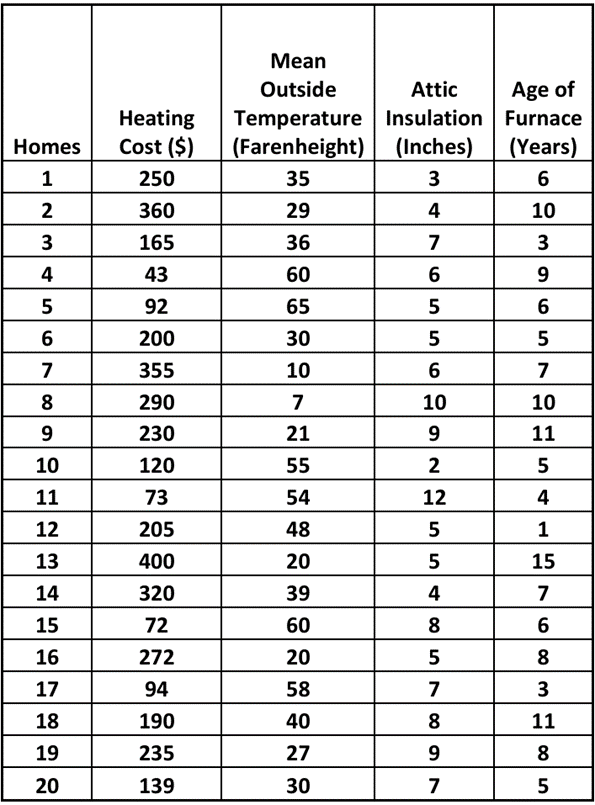

(a) Find the estimated regression equation. 

(b) Interpret the coefficients of each independent variable. 

(c) What is the heating cost of the home if outside temperature is 35 degrees, depth of insulation is 3 inches and the age of furnace is 6 years. 

(d) Find the multiple standard error of the estimates 

(e) Find the coefficient of multiple determination 

(f) Find the adjusted coefficient of determination. 

(g) Conduct a hypothesis test to determine whether a set of regression coefficients differ from zero. 

(h)  Use the t-test to show that both temperature and insulation are significantly affecting the heating cost and show their p-values from your computer printout or calculation.  

In [100]:
# Data
heating_cost <- c(250, 360, 165, 43, 92, 200, 355, 290, 230, 120, 73, 205, 400, 320, 72, 272, 94, 190, 235, 139)
temperature <- c(35, 29, 36, 60, 65, 30, 10, 7, 21, 55, 54, 48, 20, 39, 60, 20, 58, 40, 27, 30)
insulation <- c(3, 4, 7, 6, 5, 5, 6, 10, 9, 2, 12, 5, 5, 4, 8, 5, 7, 8, 9, 7)
age_furnace <- c(6, 10, 3, 9, 6, 5, 7, 10, 11, 5, 4, 1, 15, 7, 6, 8, 3, 11, 8, 5)

# (a) Linear regression
model <- lm(heating_cost ~ temperature + insulation + age_furnace)

# (b) Interpret coefficients
# interpret summary of data

# (c) Predict heating cost for given values
new_data <- data.frame(temperature = 35, insulation = 3, age_furnace = 6)
predicted_cost <- predict(model, newdata = new_data)

# (d) Standard error of estimates
std_error <- summary(model)$sigma

# (e) Coefficient of multiple determination (R^2)
r_squared <- summary(model)$r.squared

# (f) Adjusted R^2
adj_r_squared <- summary(model)$adj.r.squared

# (g) Hypothesis test for regression coefficients
coefficients_summary <- summary(model)$coefficients

# (h) T-tests for temperature and insulation
temperature_t <- coefficients_summary["temperature", "t value"]
temperature_p <- coefficients_summary["temperature", "Pr(>|t|)"]

insulation_t <- coefficients_summary["insulation", "t value"]
insulation_p <- coefficients_summary["insulation", "Pr(>|t|)"]

# Results
list(
  regression_summary = summary(model),
  predicted_cost = predicted_cost,
  std_error = std_error,
  r_squared = r_squared,
  adj_r_squared = adj_r_squared,
  coefficients_summary = coefficients_summary,
  temperature_t = temperature_t,
  temperature_p = temperature_p,
  insulation_t = insulation_t,
  insulation_p = insulation_p
)


$regression_summary

Call:
lm(formula = heating_cost ~ temperature + insulation + age_furnace)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 427.1938    59.6014   7.168 2.24e-06 ***
temperature  -4.5827     0.7723  -5.934 2.10e-05 ***
insulation  -14.8309     4.7544  -3.119  0.00661 ** 
age_furnace   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


$predicted_cost
       1 
258.9142 

$std_error
[1] 51.04855

$r_squared
[1] 0.8041701

$adj_r_squared
[1] 0.767452

$coefficients_summary
              Estimate Std. Error   t value     Pr(>|t|)
(Intercept) 427.193803 59.6014293  7.167509 2.237642e-06
temperature  -4.582663  0.7723194 -5.93